# #1 라이브러리 불러오기

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


# #2 데이터 불러오기

In [16]:
df = pd.read_csv('/Housing_Price_Data.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# #3 데이터 구조 확인

In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# #4 결측치 처리

In [19]:
df = df.dropna()

# #5 입력 변수(X, 타겟(Y)설정

In [21]:
y = df['price']
X = df.drop('price', axis=1)
X = pd.get_dummies(X, drop_first=True)


# #6 범주형 변수 원-핫 인코딩

In [23]:
X = pd.get_dummies(X, drop_first=True)

print("변환 후 X 컬럼:", X.columns.tolist())
print("X shape:", X.shape, " / y shape:", y.shape)

변환 후 X 컬럼: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
X shape: (545, 13)  / y shape: (545,)


# #6 학습/검증 데이터 분리

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20%를 테스트 데이터로 사용
    random_state=42     # 재현 가능성을 위한 시드 고정
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(436, 13) (109, 13) (436,) (109,)


# #7-1 모델 1: 선형회귀 학습 및 평가

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_pred_lr = lr.predict(X_test)

# 평가 지표 계산
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("=== Linear Regression 성능 ===")
print("R²  :", r2_lr)
print("RMSE:", rmse_lr)


=== Linear Regression 성능 ===
R²  : 0.6529242642153184
RMSE: 1324506.9600914386


# #7-2 모델 2: 랜덤포레스트 회귀 학습 및 평가

In [27]:
rf = RandomForestRegressor(
    n_estimators=300,   # 트리 개수
    max_depth=None,     # 트리 깊이 제한 없음(과제용 기본)
    random_state=42
)

rf.fit(X_train, y_train)

# 예측
y_pred_rf = rf.predict(X_test)

# 평가 지표 계산
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("=== Random Forest 성능 ===")
print("R²  :", r2_rf)
print("RMSE:", rmse_rf)


=== Random Forest 성능 ===
R²  : 0.6168607933155569
RMSE: 1391619.2131186817


# #8 두 모델 성능 비교 출력 정리

In [28]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

print(results)


               Model        R2          RMSE
0  Linear Regression  0.652924  1.324507e+06
1      Random Forest  0.616861  1.391619e+06


# #9-1 시각화 1: 실제값 vs 예측값

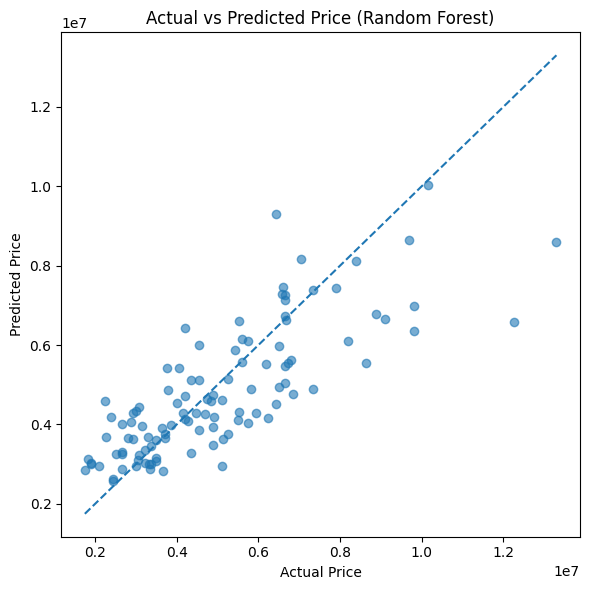

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
# y = x 기준선 추가
min_val = min(y_test.min(), y_pred_rf.min())
max_val = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.tight_layout()
plt.show()


# #9-2 시각화 2: Feature Importance

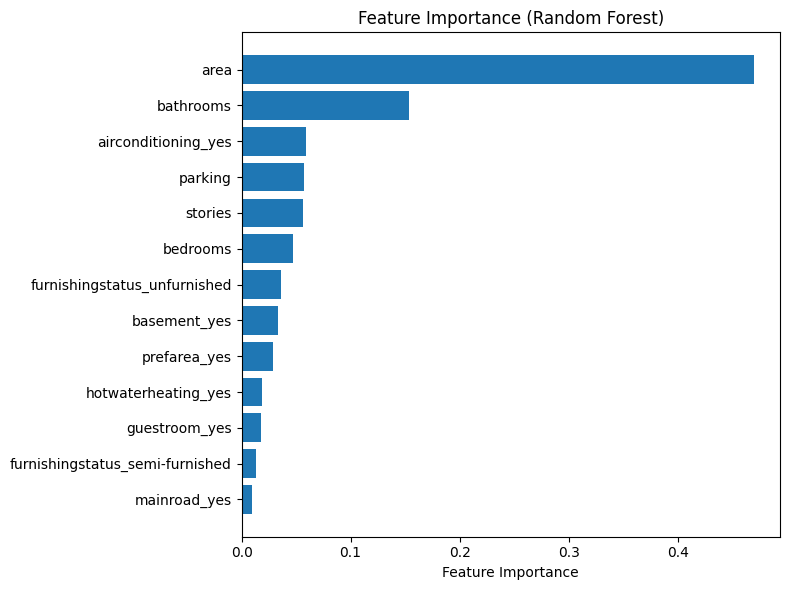

In [31]:
importances = rf.feature_importances_
feature_names = X.columns

# 중요도 순으로 정렬
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


# #9-3 선형회귀 회귀계수 보기

In [32]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coef': lr.coef_
}).sort_values(by='coef', ascending=False)

print(coef_df)


                            feature          coef
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
